# MACS 30100 PS 4

## Ling Dai

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## 1(a)

In [285]:
auto = pd.read_csv('auto.csv', header = 0, sep=",", na_values = "?")
auto.dropna(inplace = True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 1(b)

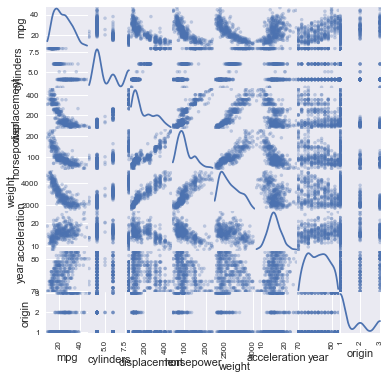

In [286]:
scatter_matrix(auto, alpha = 0.3, figsize = (6, 6),
               diagonal = 'kde')
plt.show()

## 1(c)

In [287]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## 1(d)

In [288]:
import statsmodels.api as sm

X = sm.add_constant(auto.iloc[:,1:-1])

reg1 = sm.OLS(endog=auto['mpg'], exog=X, missing='drop').fit()
results1 = reg1.summary()
print(results1)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        20:09:29   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

The fitted regression model is:

*mpg* = -17.2184 - 0.4934 *cylinders* + 0.0199 *displacement* - 0.0170 *horsepower* - 0.0065 *weight* + 0.0806 *acceleration* + 0.7508 *year* + 1.4261 *origin*

(i) The coefficients beta0 (constant), beta2(displacement), beta4 (weight), and beta6 (year) are statistically significant at the 1% level.

(ii) The coefficients beta3 (horsepower) and beta5 (acceleration) are not statistically significant at the 10% level.

(iii) The coefficient beta6 ('year') indicates that, according to our OLS regression model, each unit of increase in 'year' will lead to an average increase of 0.7508 units in our response 'mpg'.

## 1(e)

From the scatterplot matrix in 1(b), the three variable that look most likely to
have a non-linear realtionship to mpg are *displacement*, *horsepower*, and *weight*.

In [289]:
squared_terms = pd.concat([auto['displacement']**2,
                           auto['horsepower']**2,
                           auto['weight']**2,
                           auto['acceleration']**2],
                           axis = 1)

squared_terms = squared_terms.rename(columns = {'displacement' : 'displacement^2',
                                                'horsepower' : 'horsepower^2',
                                                'weight' : 'weight^2',
                                                'acceleration':'acceleration^2'})

X2 = pd.concat([X,squared_terms], axis = 1)

#(i):
reg2 = sm.OLS(endog=auto['mpg'], exog=X2, missing='drop').fit()
results2 = reg2.summary()
print(results2)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        20:09:29   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

*(i)*:
(See above)

*(ii)*:
The reported adjusted R-squared value is 0.866, which is better than the adjusted R-squared value of 0.818 in 1(d).

*(iii)*:
The p-value for the coefficient of *displacement* is 0.008 in 1(d), whereas the p-value for the coefficient of *displacement* becomes 0.408 in 1(e), which is rather insignificant. The coefficient for the squared term of *displacement* is 2.257e-05 in 1(e), with a p-value of 0.532, which is also insignificant.

*(iv)*:
The *cylinders* variable has a p-value of 0.128 in 1(d) and the p-value becomes 0.440 in 1(e). Its level of significance decreased.

## 2(a)

In [290]:
knndata = numpy.array([[0,3,0,'Red'],
                      [2,0,0,'Red'],
                      [0,1,3,'Red'],
                      [0,1,2,'Green'],
                      [-1,0,1,'Green'],
                      [1,1,1,'Red']])

knndf = pandas.DataFrame(knndata, columns = ['X1','X2','X3','Y'])

knndf[['X1','X2','X3']] = knndf[['X1','X2','X3']].apply(pandas.to_numeric)

knndf['Eucl_Dist'] = (knndf['X1']**2 + knndf['X2']**2 + knndf['X3']**2)**(1/2)

print(knndf)

   X1  X2  X3      Y  Eucl_Dist
0   0   3   0    Red   3.000000
1   2   0   0    Red   2.000000
2   0   1   3    Red   3.162278
3   0   1   2  Green   2.236068
4  -1   0   1  Green   1.414214
5   1   1   1    Red   1.732051


## 2(b)

My KNN prediction for the test point with K = 1 is 'Green', because its nearest point is Green according to the calculated Euclidean distance.

## 2(c)

My KNN prediction for the test point with K = 3 is 'Red'. Because among the three observations that are closest to out test point, 2 observations are 'Red' (point (1,1,1) and point (2,0,0)) and only 1 observation is 'Green' (point (-1, 0, 1)), the KNN algorithm with K = 3 will yield 'Red'.

## 2(e)

In [291]:
from sklearn import neighbors

#fit KNN model
clf = neighbors.KNeighborsClassifier(n_neighbors = 2)
clf.fit(knndf[['X1','X2','X3']], knndf['Y'])

#predict class of test point
print('The predicted color of the test point is {}.'.format(clf.predict([[0,0,0]])[0]))

The predicted color of the test point is Green.


## 3(a)

In [292]:
def mpg_indicator(mpg, mpg_median):
    if mpg >= mpg_median:
        return 1
    else:
        return 0

auto['mpg_high']=auto['mpg'].apply(mpg_indicator, mpg_median=numpy.median(auto['mpg']))

X3 = sm.add_constant(auto.iloc[:,1:-2])

reg3 = sm.Logit(auto['mpg_high'], X3).fit()
reg3.summary2()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   9.0000  
Dependent Variable: mpg_high         Pseudo R-squared: 0.710   
Date:               2018-02-04 20:09 AIC:              173.5398
No. Observations:   392              BIC:              205.3099
Df Model:           7                Log-Likelihood:   -78.770 
Df Residuals:       384              LL-Null:          -271.71 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
const         -17.1549   5.7638 -2.9763 0.0029 -28.4517 -5.8580
cylinders      -0.1626   0.4232 -0.3842 0.7008  -0.9920  0.6669
displacement    0.0021   0.0120  0.1741 0.8618  -0.0215  0.0257
horsepower     -0.0410   0.0239 -1.7183 0.0857  -0.0878  0.0058
weight         -0.0043   0.0011 -3.7844 0.0002  -0.0066 -0.0021
acceleration    0.0161   0.1415  0.1136 0.9096  -0.2612  0.2933
year            0.4295   0.0752  5.7090 0.0000   0.2820  0.5769
origin          0.4773   0.3620  1.3186 0.1873  -0.2322  1.1869
===============================================================

"""

According to the logistic regression results above, *weight* and *year* both have coefficients that are statistically significant at the 5% level.

## 3(b)

In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X3, auto['mpg_high'],
                                                    test_size = 0.5, random_state = 10)


## 3(c)

In [294]:
from sklearn.linear_model import LogisticRegression as LR

reg4 = LR().fit(X_train, Y_train)

beta0,beta1,beta2,beta3,beta4,beta5,beta6,beta7 = tuple(reg4.coef_[0])

print('The estimated coefficients are:\nbeta0 {}\nbeta1 {}\nbeta2 {}\nbeta3 {}\nbeta4 {}\nbeta5 {}'
      '\nbeta6 {}\nbeta7 {}\n'.format(beta0,beta1,beta2,beta3,beta4,beta5,beta6,beta7))

The estimated coefficients are:
beta0 -0.06844055812405338
beta1 -0.6562190159537299
beta2 0.005607640770557793
beta3 -0.03895549343858752
beta4 -0.004994123686206086
beta5 -0.14316873517508263
beta6 0.30013051902691174
beta7 -0.1497678127361759



## 3(d)

In [295]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_test_hat = reg4.predict(X_test)

confusion_matrix = confusion_matrix(Y_test, Y_test_hat)
print('Confusion Matrix:\n{}'.format(confusion_matrix))
print('\nClassification Report:\n{}'.format(classification_report(Y_test, Y_test_hat)))


Confusion Matrix:
[[86 13]
 [12 85]]

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



According to the classification report above, the prediction precision is slightly higher when predicting low mpg (*mpg_high* = 0) than when predicting high mpg (*mpg_high* = 1).